## CRISP-DM Phase 4. Modelling

In [1]:
# Dependencies
import sys
sys.path.append('../src')
import utils
import data_processor
import cross_validator
import deeplearning_build
import pandas as pd
from sklearn.model_selection import train_test_split

# Load processed data
processed_data: pd.DataFrame = utils.load_preprocessed_data()

# Data preprocessing object
processor = data_processor.DataProcessor(processed_data)
X, y = processor.create_feature_matrix_and_target_vector(target_column="price actual")

# Target variable should be the last column (for compatibility with deeplearning_build)
processed_data = processed_data.drop(columns=["price actual"])
processed_data["price actual"] = y

# Split data into train, validation and test sets (80%, 10%, 10%)
train_size = int(len(processed_data) * 0.8)
val_size = int(len(processed_data) * 0.1)
test_size = len(processed_data) - train_size - val_size

X_train, X_val, _ = processed_data.iloc[0:train_size], processed_data.iloc[train_size : train_size + val_size], processed_data.iloc[train_size + val_size :]

In [2]:
deepl_model = deeplearning_build.deepL(X_train, X_val)

Instructions for updating:
Lambda fuctions will be no more assumed to be used in the statement where they are used, or at least in the same block. https://github.com/tensorflow/tensorflow/issues/56089


Epoch 1/10
1870/1870 [==============================] - 28s 12ms/step - loss: 0.2917 - mse: 0.2917 - mae: 0.3928 - mape: 256.3423 - val_loss: 0.4463 - val_mse: 0.4463 - val_mae: 0.5290 - val_mape: 385.8717 - lr: 0.0010
Epoch 2/10
1870/1870 [==============================] - 21s 11ms/step - loss: 0.1315 - mse: 0.1315 - mae: 0.2677 - mape: 210.1257 - val_loss: 0.2643 - val_mse: 0.2643 - val_mae: 0.3917 - val_mape: 252.0985 - lr: 0.0010
Epoch 3/10
1870/1870 [==============================] - 25s 14ms/step - loss: 0.0777 - mse: 0.0777 - mae: 0.2070 - mape: 154.8968 - val_loss: 0.0896 - val_mse: 0.0896 - val_mae: 0.2286 - val_mape: 143.3994 - lr: 0.0010
Epoch 4/10
1870/1870 [==============================] - 25s 13ms/step - loss: 0.0531 - mse: 0.0531 - mae: 0.1714 - mape: 134.4391 - val_loss: 0.0610 - val_mse: 0.0610 - val_mae: 0.1941 - val_mape: 131.8531 - lr: 0.0010
Epoch 5/10
1870/1870 [==============================] - 27s 14ms/step - loss: 0.0451 - mse: 0.0451 - mae: 0.1585 - mape: 120

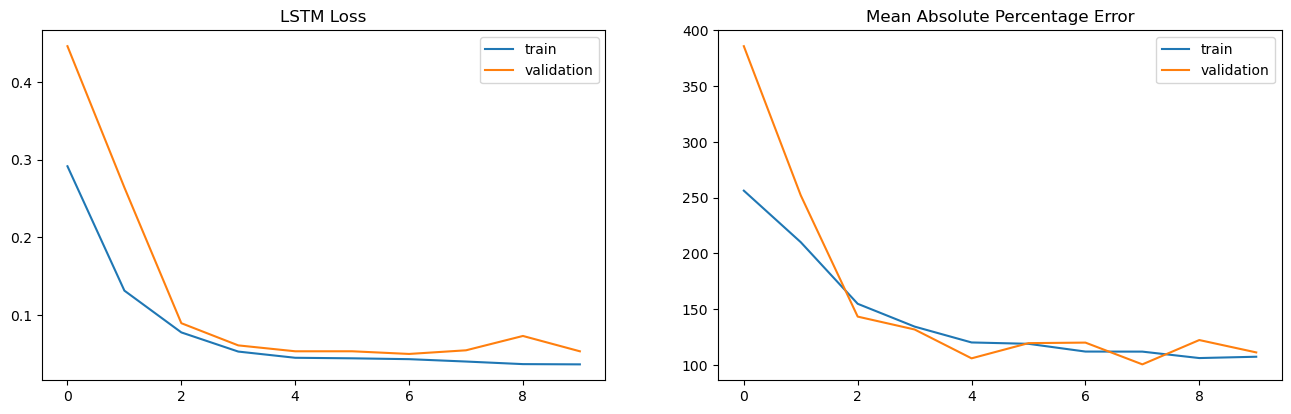

In [4]:
deepl_model.train("LSTM", plot_history=True)

In [ ]:
# Initialize the deepL class
dl = deeplearning_build.deepL(X_train, X_val)

# List of models to test
models_to_test = ["LSTM", "GRU", "BiLSTM", "CNN-LSTM", "CNN-GRU", "CNN-BiLSTM", "CNN-BiLSTM-Attention", "TCN"]

# Perform cross-validation and evaluate models
for model_name in models_to_test:
    print(f"Training and evaluating {model_name}...")
    
    # Train the model
    trained_model = dl.train(model_name, plot_history=False)  # Set plot_history to True if you want to plot the training history
    
    # Evaluate on the validation set
    val_predictions = dl.predict(model_name, X_val)
    val_metrics = dl.evaluate(model_name, X_val, val_predictions)
    
    print(f"{model_name} Validation Metrics: {val_metrics}")

# After cross-validation, best-performing model for evaluation on the test set is selected

best_model_name = "choose_the_best_model"  # Replace with the best-performing model
test_predictions = dl.predict(best_model_name, X_val)
test_metrics = dl.evaluate(best_model_name, Xval, test_predictions)

print(f"{best_model_name} Test Metrics: {test_metrics}")